In [2]:
## 引入头文件
import cv2
import numpy as np
from skimage import filters, feature, img_as_float, measure, morphology
import os
import matplotlib.pyplot as plt
from skimage.feature import shape_index
from skimage.draw import circle
from skimage.filters import try_all_threshold
from skimage.segmentation import chan_vese
from skimage.filters import threshold_otsu, threshold_triangle

In [3]:
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\InnerArea'
os.chdir(path)

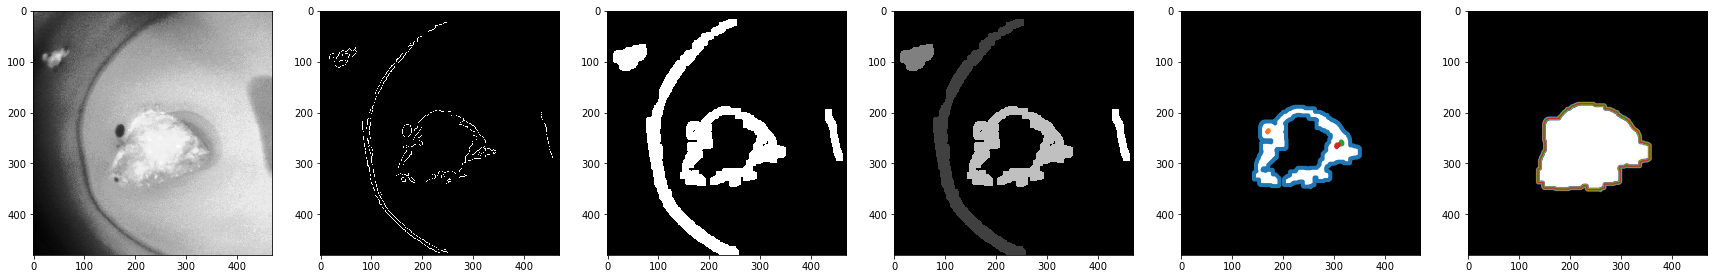

In [53]:
#### 用于验证边缘检测算法

os.chdir('../InnerArea')

# 读取图像（测试）
imageTest = cv2.imread("0511.bmp", cv2.IMREAD_GRAYSCALE)

# 创建画布
plt.figure(figsize=(30,5))
# 直方图均值化并显示原图
plt.subplot(1,6,1)
plt.imshow(imageTest,cmap=plt.cm.gray)

# canny边缘检测
ed1 = feature.canny(imageTest,sigma=1.5)

# 让边缘标白，其余为黑
tmp = np.ndarray(shape=np.shape(ed1))
tmp[ed1] = 255

# 区域生长
kernel = np.ones((5,5),np.uint8)
tmp = cv2.dilate(tmp, kernel, iterations=3)

# 标记连通区域
result,labels = measure.label(tmp,return_num=True)
rr = result == 3

# 画出边缘
contours = measure.find_contours(rr,0.5)

# ed2 = feature.canny(imageTest,sigma=1.75)
# ed2 = cv2.dilate(ed2, kernel, iterations=2)
# ed3 = feature.canny(imageTest,sigma=2)
# ed3 = cv2.dilate(ed3, kernel, iterations=2)
# ed4 = feature.canny(imageTest,sigma=2.25)
# ed4 = cv2.dilate(ed4, kernel, iterations=2)
# ed5 = feature.canny(imageTest,sigma=2.5)
# ed5 = cv2.dilate(ed5, kernel, iterations=2)

plt.subplot(1,6,2)
plt.imshow(ed1,cmap=plt.cm.gray)
plt.subplot(1,6,3)
plt.imshow(tmp,cmap=plt.cm.gray)
plt.subplot(1,6,4)
plt.imshow(result,cmap=plt.cm.gray)
plt.subplot(1,6,5)
plt.imshow(rr,cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=4)
plt.subplot(1,6,6)


kernel = np.ones((5,5),np.uint8)# 生长
tmp = np.zeros(shape=rr.shape)
tmp[rr] = 255
image = cv2.dilate(tmp, kernel, iterations=3)
#image[image==255] = True
image = np.where(image==255,True,False)
image = morphology.remove_small_holes(image,10000)
contours = measure.find_contours(image,0.5)


for n, contour in enumerate(contours):
    for ii in range(4):
        
        plt.plot(contour[:, 1], contour[:, 0], linewidth=4-ii)
plt.imshow(image,cmap=plt.cm.gray)

# plt.subplot(1,6,6)
# rrr = morphology.flood_fill(rr,(250,250),255)
# plt.imshow(rrr,cmap=plt.cm.gray)

# 至此得出，sigma选择2.25效果较好

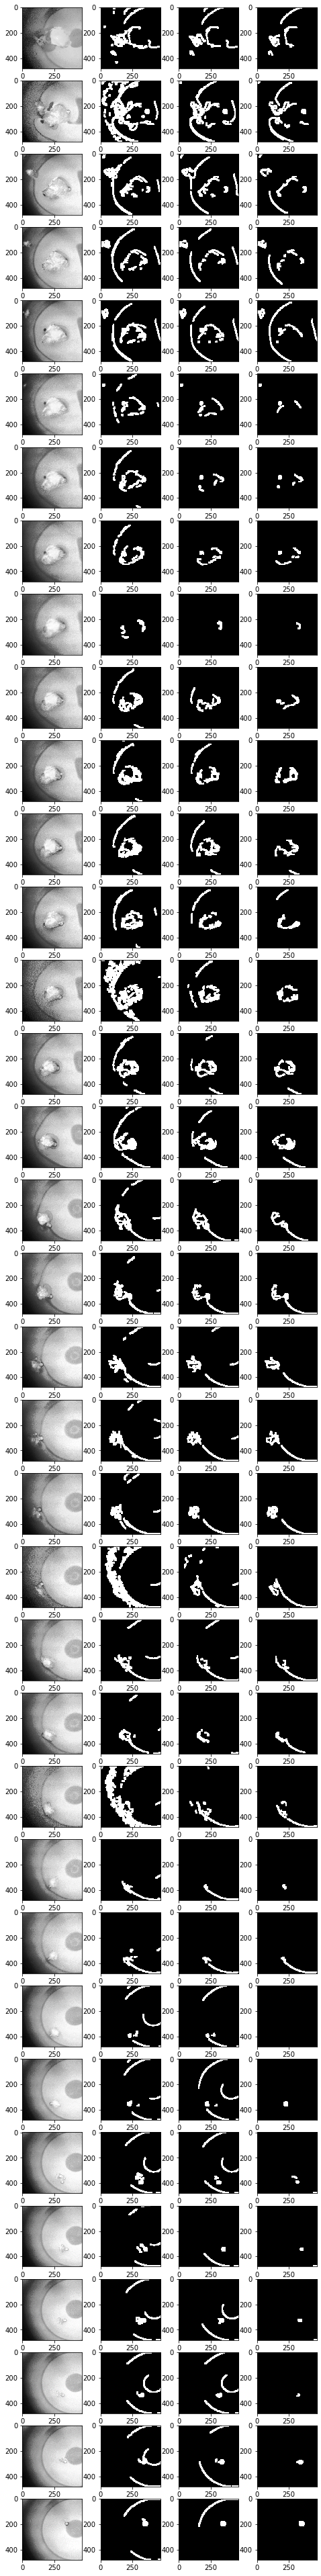

In [14]:
plt.figure(figsize=(8,100))
for i,name in enumerate(range(497,600,3)):
    image = cv2.imread('0'+str(name)+'.bmp', cv2.IMREAD_GRAYSCALE)
    plt.subplot(50,4,i*4+1)
    plt.imshow(image,cmap=plt.cm.gray)
    
    for index,sigmaTmp in enumerate([1.5,2,2.5]):

        # canny边缘检测
        ed = feature.canny(image,sigma=sigmaTmp)
        # 让边缘标白，其余为黑
        tmp = np.ndarray(shape=np.shape(ed))
        tmp[ed] = 255
        # 区域生长
        kernel = np.ones((5,5),np.uint8)
        tmp = cv2.dilate(tmp, kernel, iterations=3)
        # 标记连通区域
        #result,labels = measure.label(tmp,return_num=True)
        #rr = result == labels - 1
        # 画出边缘
        #contours = measure.find_contours(rr,0.5)
        
        plt.subplot(50,4,i*4+2+index)
        plt.imshow(tmp,cmap=plt.cm.gray)
        #plt.subplot(50,4,i*4+3+index*2)
        #plt.imshow(rr,cmap=plt.cm.gray)

        
#         for n, contour in enumerate(contours):
#             plt.plot(contour[:, 1], contour[:, 0], linewidth=2)


In [ ]:

labelProps = measure.regionprops(result)
labelPropsTable = measure.regionprops_table(result)
print(labelProps)

In [149]:
os.chdir('../InnerArea')
imageProp = [(0, 1),(0, 1),(0, 1),(0, 1),(0, 1), (1,-3),(1,-3),(1,-2),(1,-1),(1,-2),# 9, name+3 == index
             (1,-2),(1,-2),(1,-1),(2,-1),(2,-2), (0, 1),(2,-1),(2,-3),(2,-2),(2,-3),# 19
             (0, 1),(2,-1),(1,-4),(0,-2),(0, 1), (0, 1),(1,-2),(1,-2),(1,-3),(2,-2),# 29
             (2,-2),(2,-2),(2,-2),(2,-2),(2,-2), (2,-2),(2,-2),(3,-5),(3,-4),(3,-3),# 39
             (0, 1),(3,-2),(3,-2),(3,-2),(3,-2), (3,-2),(3,-2),(3,-2),(3,-3),(3,-2),# 49
             (3,-2),(1,-2),(1,-2),(3,-2),(3,-3), (3,-2),(3,-1),(3,-2),(3,-2),(3,-2),# 59
             (3,-3),(0, 1),(0, 1),(0, 1),(0, 1), (0, 1),(3,-1),(3,-2),(3,-1),(3,-2),# 69
             (0, 1),(0, 1),(0, 1),(2,-2),(2,-3), (3,-2),(2,-3),(2,-2),(2,-1),(2,-2),# 79
             (1,-4),(1,-2),(1,-3),(2,-2),]
passList = [i for i,one in enumerate(imageProp) if one[0]==0]
expandList = [0,1,2,3,4,23,24,25,26,80,81,82,83,84,85,86]
cutList = [43,44,45,46,48,49,50,51,52,53,55,56,57,66,67,68,69,73,77,78,79]

In [150]:
cutDic = {}
for i,one in enumerate(imageProp):
    if one[1] == 1:
        cutDic[i] = (0,0,0,0)
for i in cutList:
    cutDic[i] = (0,0,0,0)


In [151]:
cutDic = {
    0: (160, 375, 170, 390),
    1: (160, 400, 170, 390),
    2: (185, 375, 180, 370),
    3: (190, 375, 180, 370),
    4: (190, 375, 180, 360),
    15: (150, 375, 190, 390),
    20: (150, 375, 190, 390),
    24: (150, 375, 190, 390),
    25: (150, 375, 190, 390),
    40: (160, 375, 125, 390),
    43: (190, 375, 125, 390),
    44: (190, 375, 115, 390),
    45: (190, 375, 110, 390),
    46: (190, 390, 110, 390),
    48: (210, 390, 100, 390),
    49: (210, 390, 90, 390),
    50: (210, 390, 90, 390),
    51: (210, 390, 90, 390),
    52: (210, 390, 90, 390),
    53: (210, 380, 90, 390),
    55: (210, 380, 90, 390),
    56: (210, 380, 70, 390),
    57: (210, 375, 70, 390),
    61: (250, 375, 70, 180),
    62: (280, 395, 70, 200),
    63: (290, 405, 70, 200),
    64: (310, 400, 70, 200),
    65: (315, 400, 70, 200),
    66: (320, 420, 70, 210),
    67: (325, 450, 70, 210),
    68: (325, 450, 70, 210),
    69: (250, 450, 70, 210),
    70: (250, 450, 70, 210),
    71: (250, 450, 70, 210),
    72: (250, 450, 70, 200), 
    73: (250, 450, 70, 200),
    77: (150, 420, 90, 390),
    78: (150, 420, 90, 390),
    79: (150, 420, 90, 390),
    81: (200, 420, 150,250),
    82: (200, 420, 150,240),
    83: (200, 420, 150,230),
    }
def cutProcess(image,area):
    image[0:area[0],:] = 0
    image[area[1]:,:] = 0
    image[:,0:area[2]] = 0
    image[:,area[3]:] = 0
    return image

In [153]:
try:
    os.makedirs('../BinaryResult')
except:
    pass

for i,name in enumerate(range(497,611)):
    if i in passList:
        # continue
        sigmaType = 1
        label = imageProp[i][1]
    if i < len(imageProp):
        sigmaType = imageProp[i][0]
        label = imageProp[i][1]
    else:
        continue
    
    if sigmaType == 1:
        sigma = 1.25
    elif sigmaType == 2:
        sigma = 1.5
    elif sigmaType == 3:
        sigma = 1.75
        
    image = cv2.imread('0'+str(name)+'.bmp', cv2.IMREAD_GRAYSCALE)# 读入
    edge = feature.canny(image,sigma = sigma)# 边缘检测
    tmp = np.ndarray(shape=np.shape(edge))# 边缘描白
    tmp[edge] = 255
    
    if i in expandList:
        iteration = 8
    else:
        iteration = 5
    
    kernel = np.ones((5,5),np.uint8)# 生长
    tmp = cv2.dilate(tmp, kernel, iterations=iteration)
    
    if i==25:
        tmp[250:300,200:310] = 255
    if label == 1:
        image = cutProcess(tmp,cutDic[i])
        cv2.imwrite('../BinaryResult/0'+str(name)+'.bmp',image)
        continue
    
    result,labels = measure.label(tmp,return_num=True)# 标记连通区域
    rr = result == labels + 1 + label    
    
    if i in cutDic:
        rr = cutProcess(rr,cutDic[i])
        pass
        
    rrr = np.ndarray(shape=np.shape(rr))
    rrr[rr] = 255
    
    cv2.imwrite('../BinaryResult/0'+str(name)+'.bmp',rrr)

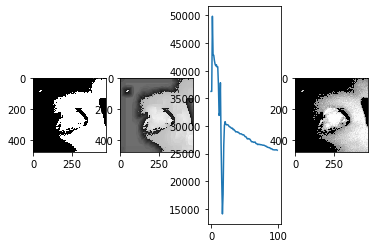

In [138]:
# ## 用来测试chan_vese图
# imageTest = cv2.imread("0511.bmp", cv2.IMREAD_GRAYSCALE)
# imageTest = cv2.equalizeHist(imageTest)


# imageTest.astype(np.int)

# imageTest[imageTest<140] = 0
# imageTest = (imageTest - np.ones(shape=np.shape(imageTest))*140)*255/115
# #imageTest[imageTest>219] = np.nan

# #imageTest[(imageTest>165 and imageTest<220).any()]

# #imageTest = cv2.equalizeHist(imageTest)


# imageTest = img_as_float(imageTest)

# # tmp = np.ndarray(shape=np.shape(imageTest))
# # tmp[imageTest] = 255

# cv = chan_vese(imageTest, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=100,
#                dt=0.5, init_level_set="checkerboard", extended_output=True)
# plt.subplot(1,4,1)
# plt.imshow(cv[0],cmap=plt.cm.gray)
# plt.subplot(1,4,2)
# plt.imshow(cv[1],cmap=plt.cm.gray)
# plt.subplot(1,4,3)
# plt.plot(cv[2])
# plt.subplot(1,4,4)
# plt.imshow(imageTest,cmap=plt.cm.gray)

# def processChanVese(image):
#     imageTmp = img_as_float(image)
#     cv = chan_vese(imageTmp, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=100,
#                dt=0.5, init_level_set="checkerboard", extended_output=True)
#     return cv[1]
    

In [ ]:

# fig, ax = try_all_threshold(imageTest, figsize=(10, 8), verbose=False)
# plt.show()


In [ ]:
# image = imageTest
# im = imageTest<1
# image[im] = 0
ed2 = feature.canny(imageTest)
plt.imshow(imageTest,cmap=plt.cm.gray)

In [ ]:
# run = True
# run = False
# try:
#     os.makedirs('../BinaryResult')
# except:
#     pass
# for oneImage in os.listdir():
#     if not run:
#         break
#     imageTmp = cv2.imread(oneImage, cv2.IMREAD_GRAYSCALE)
#     imageTmp = cv2.equalizeHist(imageTmp)

#     image = processChanVese(imageTmp)
#     thre = threshold_triangle(image)
#     tmp = image > thre
#     tmp = tmp[:470,:350]
    
#     result = np.ndarray(shape=np.shape(tmp))
#     result[tmp] = 255
#     cv2.imwrite('../BinaryResult/'+oneImage,result)

In [160]:
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\BinaryResult'
os.chdir(path)

In [ ]:
image = plt.imread('0540.bmp')
image = morphology.closing(image)
kernel = np.ones((5,5),np.uint8)# 生长
image = cv2.dilate(image, kernel, iterations=10)
image = morphology.remove_small_holes(image,10000)
plt.imshow(image,cmap=plt.cm.gray)

In [ ]:
try:
    os.makedirs('../BinaryResultFilled')
except:
    pass

In [180]:
for oneImage in os.listdir():
    image = plt.imread(oneImage)
    image = morphology.closing(image)
    kernel = np.ones((5,5),np.uint8)# 生长
    image = cv2.dilate(image, kernel, iterations=10)
    image = morphology.remove_small_holes(image,10000)
    
    tmp = np.ndarray(shape=np.shape(image))
    tmp[image] = 255
    cv2.imwrite('../BinaryResultFilled/'+oneImage,tmp)
    

C:\Users\Kfor\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  


In [4]:
try:
    os.makedirs('../OriginResult')
except:
    pass

In [28]:
os.chdir('../BinaryResultBack')
for oneImage in os.listdir():
    if oneImage=='0581.bmp':
        break
    image = plt.imread(oneImage)
    imageOrigin = plt.imread('../Antij_source_result/'+oneImage)
    tmp = np.ndarray(shape=np.shape(image),dtype = np.bool)
    tmp[image==255] = True
    result = np.ndarray(shape=tmp.shape)
    result = np.where(tmp,imageOrigin,np.zeros(shape=tmp.shape))
    cv2.imwrite('../OriginResult/'+oneImage,imageOrigin)

(994, 1095)
(994, 1095)


True

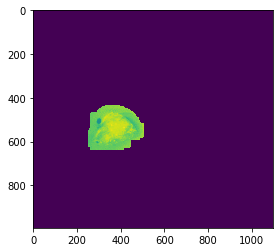

In [27]:
os.chdir('../BinaryResultBack')
oneImage = '0511.bmp'
image = plt.imread(oneImage)
imageOrigin = plt.imread('../Antij_source_result/'+oneImage)
tmp = np.ndarray(shape=np.shape(image),dtype = np.bool)
tmp[image==255] = True
result = np.ndarray(shape=tmp.shape)
result = np.where(tmp,imageOrigin,np.zeros(shape=tmp.shape))

plt.imshow(result.reshape(np.shape(tmp)))
cv2.imwrite('../OriginResult/'+oneImage,result)